# Airline Passenger Satisfaction
<img src="https://drive.google.com/uc?id=1HvDJElliYQKbdyiCQXsoKdjC8KefRoSL" alt="aitplane in the skies" style="width:500px;"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipydatagrid
import seaborn as sns
import bqplot as bqp

In [2]:
airlines_df = pd.read_csv("airline_passenger_satisfaction.csv")

Exploratory Data Analysis

In [3]:
# Quick overview of the columns and their types
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
# Summary statistics
airlines_df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


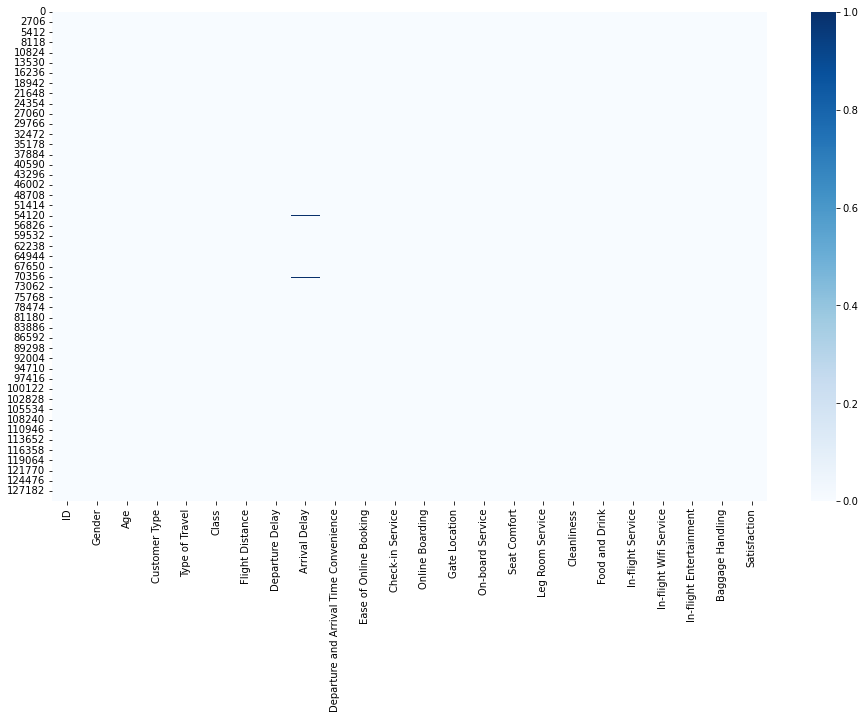

In [5]:
# Checking for NaN values
plt.figure(figsize=(16,9))
sns.heatmap(airlines_df.isna().astype(int), cmap='Blues');

In [6]:
airlines_df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [7]:
# Examine data with null values
airlines_df[airlines_df['Arrival Delay'].isnull()]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
246,247,Male,11,Returning,Business,Business,719,38,NaN,1,...,4,4,3,4,4,3,4,4,4,Neutral or Dissatisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,...,3,4,3,3,3,3,3,3,3,Satisfied
1965,1966,Male,36,Returning,Business,Economy,383,2,NaN,4,...,5,2,2,2,2,2,2,2,3,Satisfied
2407,2408,Female,55,Returning,Business,Business,2904,58,NaN,5,...,4,3,4,4,5,4,4,4,4,Neutral or Dissatisfied
2448,2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,...,4,1,2,1,1,2,1,1,1,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129000,129001,Male,46,First-time,Business,Business,2704,7,NaN,3,...,4,4,2,4,4,4,3,4,3,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,...,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,...,4,4,4,5,2,4,4,4,4,Satisfied
129015,129016,Female,22,Returning,Business,Business,2611,8,NaN,3,...,4,4,3,4,4,4,3,4,3,Satisfied


Given we have only 393 rows with NaN for Arrival Delay, we can probably drop all NaN rows without much impact on the overall analysis

In [8]:
airlines_df.dropna(inplace=True)

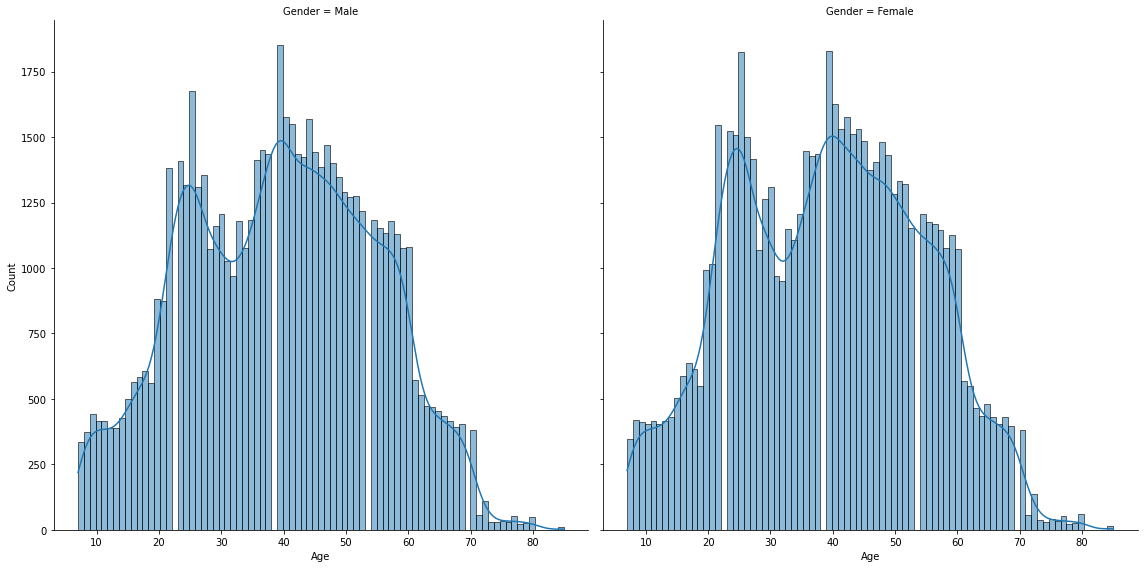

In [9]:
# Distribution of ages by gender
sns.displot(airlines_df, x='Age', kind='hist', col='Gender', kde=True, height=8, aspect=1);

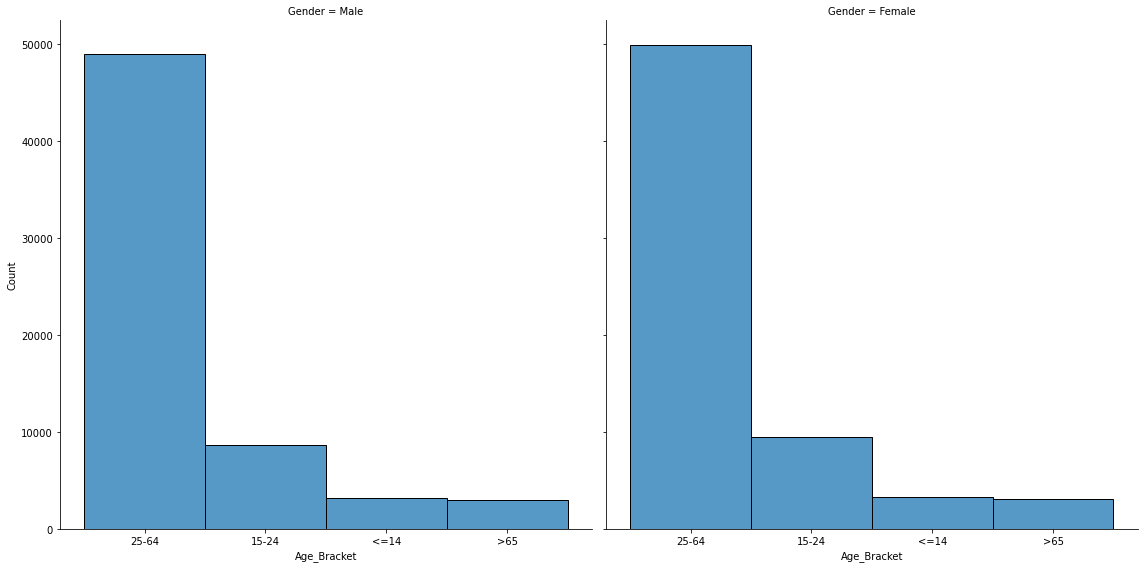

In [10]:
# Age by bracket
def get_age_bracket(age):
    if age <= 14:
        return "<=14"
    elif age >= 15 and age <= 24:
        return "15-24"
    elif age >=25 and age <= 64:
        return "25-64"
    else:
        return ">65"
airlines_df['Age_Bracket'] = airlines_df["Age"].apply(get_age_bracket)
sns.displot(airlines_df, x='Age_Bracket', kind='hist', col='Gender', kde=False, height=8, aspect=1);

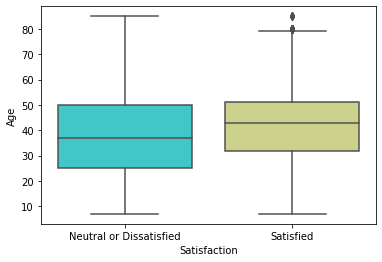

In [11]:
# Relationship between satisfaction and age
sns.boxplot(data=airlines_df, x="Satisfaction", y="Age", palette="rainbow");

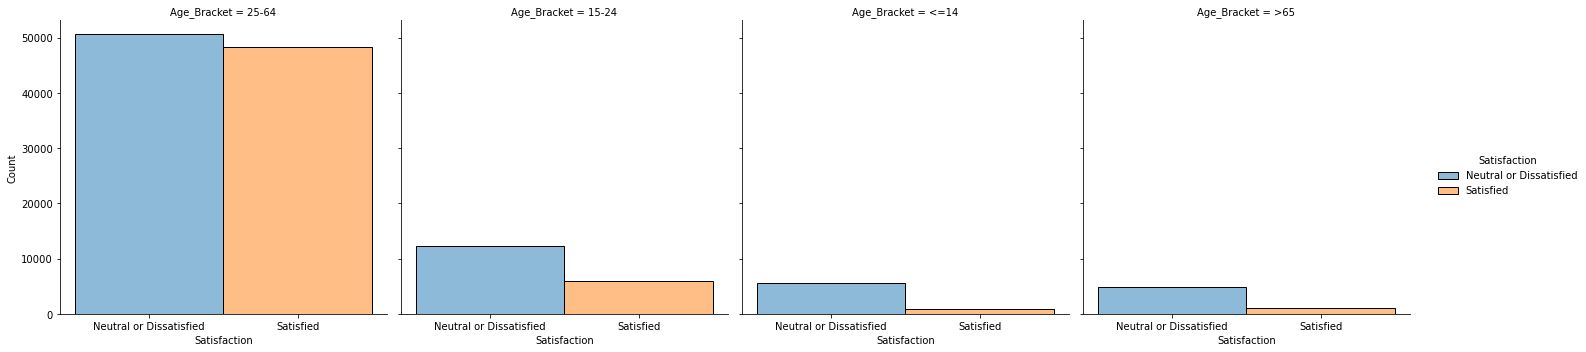

In [12]:
# Relationship between satisfaction and age bracket
# sns.countplot(data=airlines_df, x="Satisfaction")
sns.displot(airlines_df, x='Satisfaction', kind='hist', col='Age_Bracket', kde=False, hue="Satisfaction");

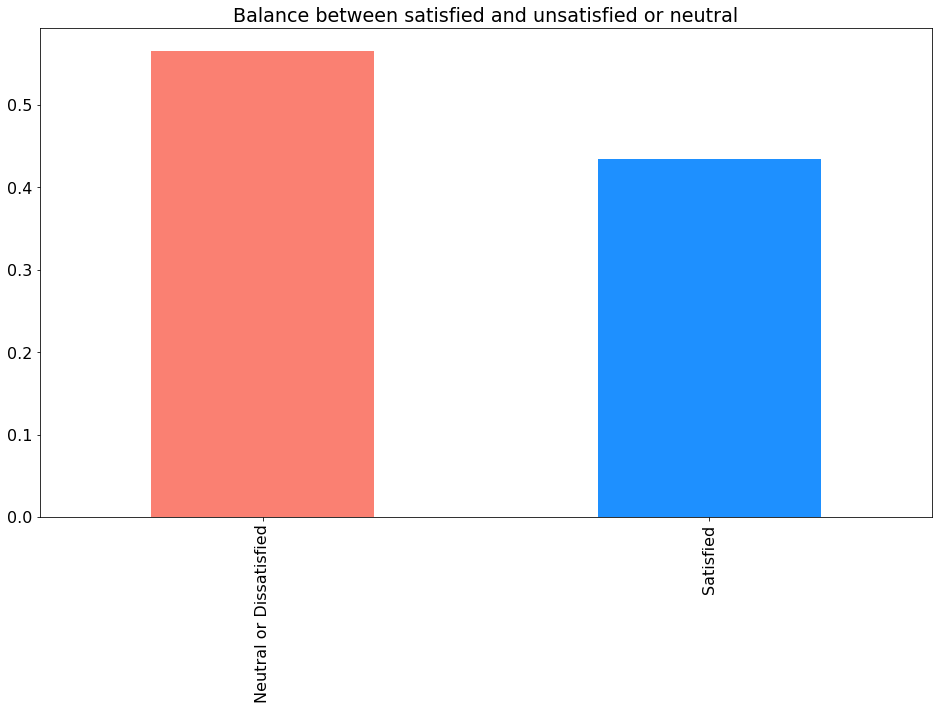

In [13]:
# Balance between satisfied and unsatisfied customers
plt.rcParams['font.size'] = '16'
fix, ax = plt.subplots(figsize=(16,9))
ax.axes = airlines_df['Satisfaction'].value_counts(normalize=True).plot(kind="bar", color=['salmon', 'dodgerblue'])
plt.title("Balance between satisfied and unsatisfied or neutral");

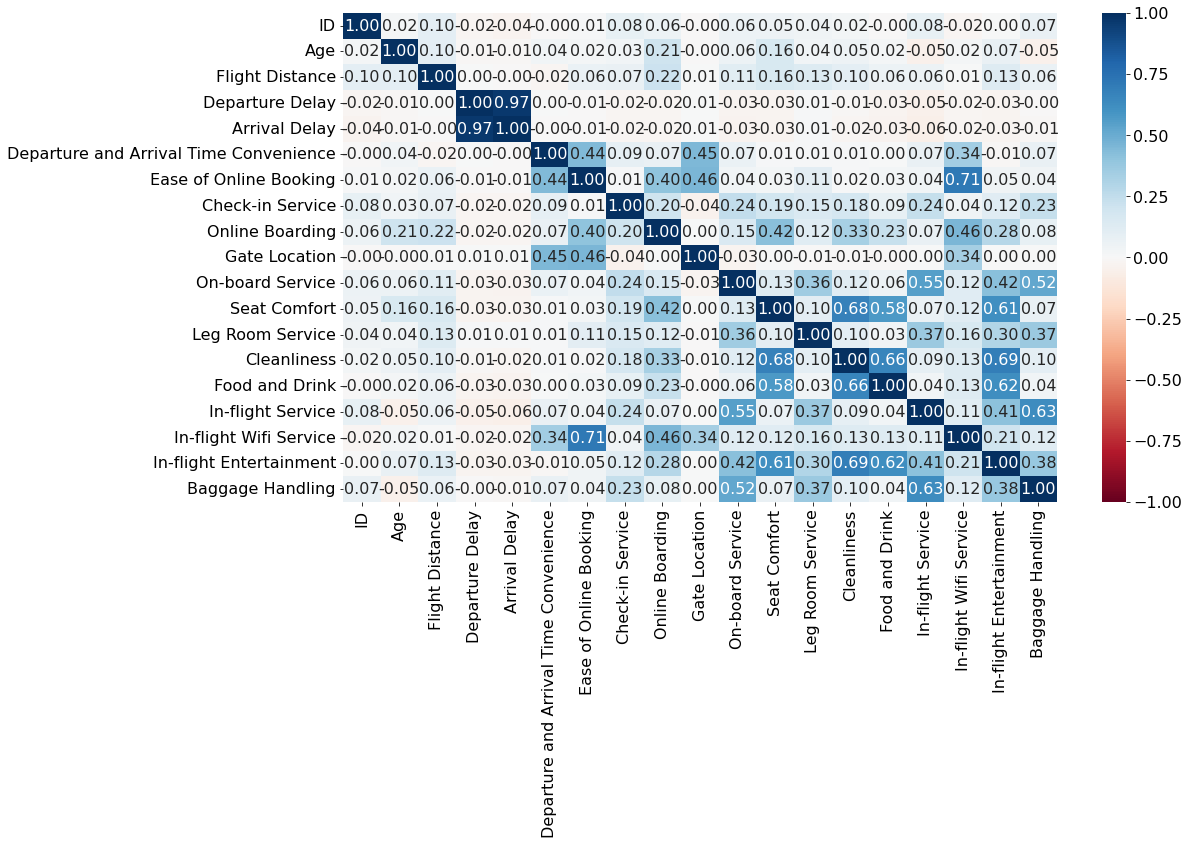

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(airlines_df.corr(), cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1);

# Interactive EDA

In [15]:
# Setting up a datagrid
grid = ipydatagrid.DataGrid(airlines_df)

# Some theming to add some color
cotton_candy = {
    "background_color": "rgb(255, 245, 251)",
    "header_background_color": "rgb(207, 212, 252, 1)",
    "header_grid_line_color": "rgb(0, 247, 181, 0.9)",
    "vertical_grid_line_color": "rgb(0, 247, 181, 0.3)",
    "horizontal_grid_line_color": "rgb(0, 247, 181, 0.3)",
    "selection_fill_color": "rgb(212, 245, 255, 0.3)",
    "selection_border_color": "rgb(78, 174, 212)",
    "header_selection_fill_color": "rgb(212, 255, 239, 0.3)",
    "header_selection_border_color": "rgb(252, 3, 115)",
    "cursor_fill_color": "rgb(186, 32, 186, 0.2)",
    "cursor_border_color": "rgb(191, 191, 78)",
}

grid.grid_style = cotton_candy

In [16]:
# Define widgets and variables
numerical_cols = airlines_df.select_dtypes([int, float]).columns.tolist()
age_range = (airlines_df['Age'].min(), airlines_df['Age'].max())
columns_index = {k:grid._column_name_to_index(k) + 1 for k in airlines_df.columns}
range_slider = widgets.IntRangeSlider(min=age_range[0], max=age_range[1], value=age_range, description="Age Range")
gender_dropdown = widgets.Dropdown(options=airlines_df['Gender'].unique().tolist() + ["Both"], 
                                   value="Both", layout={"width":"200px"}, description="Gender")
scatter_x_dropdown = widgets.Dropdown(options=numerical_cols, 
                                      value=numerical_cols[2], layout={"width":"250px"}, description="Scatter X-Axis")
scatter_y_dropdown = widgets.Dropdown(options=numerical_cols, value=numerical_cols[1], 
                                      layout={"width":"250px"}, description="Scatter Y-Axis")

# Chart
sc_x = bqp.LinearScale()
sc_y = bqp.LinearScale()
scatt = bqp.ScatterGL(
    x=airlines_df[scatter_x_dropdown.value].values,
    y=airlines_df[scatter_y_dropdown.value].values,
    names=np.arange(10),
    scales={"x": sc_x, "y": sc_y},
    colors=["limegreen", "purple"],
)
ax_x = bqp.Axis(scale=sc_x, label="")
ax_y = bqp.Axis(scale=sc_y, orientation="vertical", tick_format="d", label="")
fig = bqp.Figure(marks=[scatt], axes=[ax_x, ax_y], padding_x=0.025, interaction=bqp.interacts.PanZoom(scales={'x': [sc_x], 'y': [sc_y]}),
                 title="Select axes from the dropdown boxes!")


# Event handlers
def filter_gender(e):
    selected_gender = e.get("new")
    if selected_gender == "Both":
        grid._transforms = list(filter(lambda x: x['columnIndex'] != columns_index.get("Gender"), grid._transforms))
        return 
    
    grid.transform([
        {"type": "filter", "operator": "=", "columnIndex": columns_index.get("Gender"), "value": selected_gender},
        {'type': 'filter', 'columnIndex': columns_index.get("Age"), 'operator': 'between', 'value': range_slider.value}
    ])
    
def filter_age(e):
    age_tuple = e.get("new")
    grid.transform([
        {'type': 'filter', 'columnIndex': columns_index.get("Age"), 'operator': 'between', 'value': age_tuple}
    ])
    
def update_scatter_chart(e):
    scatt.x = airlines_df[scatter_x_dropdown.value].values
    scatt.y = airlines_df[scatter_y_dropdown.value].values
    ax_x.label = scatter_x_dropdown.value
    ax_y.label = scatter_y_dropdown.value
    fig.title = f"{scatter_x_dropdown.value} vs. {scatter_y_dropdown.value}"
    
    
gender_dropdown.observe(filter_gender, names=['value'])
range_slider.observe(filter_age, names=['value'])
scatter_x_dropdown.observe(update_scatter_chart, names=["value"])
scatter_y_dropdown.observe(update_scatter_chart, names=["value"])


# Rendering the grid and widgets
widgets.VBox([
    widgets.HTML(value="<h1>Airline Passengers Data Explorer</h1>"),
    widgets.HBox([
        range_slider, gender_dropdown, scatter_x_dropdown, scatter_y_dropdown
    ], layout=widgets.Layout(flex='1 1 auto', width='100%')),
    grid,
    fig
])